# Espaço Amostral e Eventos

Uma mulher praticante de esporte com 20 e poucos anos chega chega na emergência do hospital reclamando de tontura depois de um banho quente.

Faz-se um eletrocardiograma que acusa infarto:

- a probabilidade de um falso positivo é de 0.1;
- a probabilidade de um falso negativo também é 0.1;
- a probabilidade de uma pessoa com o perfil citado acima ter um infarto é de 0.001.

Ela deve se desesperar?


## Experimento Aleatório

Um experimento que pode gerar diferentes resultados, mesmo quando repetido nas mesmas condições é chamado de **experimento aleatório**.

### Exemplo

Medir a corrente que passa em um fio.

Medidas, nas mesmas condições, são ligeiramente diferentes, por conta de vários fatores:

- variações na temperatura do fio;
- variações na temperatura ambiente;
- precisão do equipamento usado na medição;
- impurezas no fio, se a medida for feita em lugares ligeiramente diferentes do fio...

O objetivo é _quantificar_ e _modelar_ essas variações para poder incorporar essa _incerteza_ na análise e construção de processos de forma que eles não sejam invalidados pelas variações.


## Modelos Probabilistas

- Tentamos modelar um problema físico em uma estrutura matemática.
- Usamos essa estrutura para analisar a realidade e fazer previsões sobre o sistema.
  - As vezes, as previsões geradas pelo modelo não condizem com a realidade.
- Devemos _melhorar_ o modelo para que ele reflita a realidade com precisão.


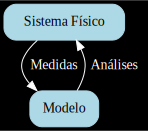

In [1]:
import pathlib
import graphviz
filepath = pathlib.Path('./modelo_probabilista.gv')
graphviz.Source.from_file(filepath)


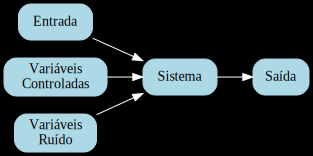

In [2]:
import pathlib
import graphviz
filepath = pathlib.Path('./experimento_aleatório.gv')
graphviz.Source.from_file(filepath)


## Espaços Amostrais

O **Espaço Amostral** é o conjunto de todos os possíveis resultados diferentes de um _experimento aleatório_.

Exemplos:

- Qual número fica voltado para cima ao se lançar um dado.
- Quanto tempo um flash fica ligado quando apertamos o botão de tirar uma foto.
- Qual a corrente elétrica que passa por um fio em um dado momento.
- Qual a temperatura ambiente em um local específico.
- Quanto tempo um circuito demora para enviar uma resposta após receber uma requisição.

Espaços amostrais são, normalmente, denotados pela letra $\Omega$.


## Eventos

Um **Evento** é um subconjunto de um _espaço amostral_ de um _experimento aleatório_.

Normalmente, estamos interessados em manipular eventos para gerar outros eventos.

Eventos são, normalmente, denotados por letras maiúsculas do alfabeto, $A$, $B$, $C$, ...

Como eventos são conjuntos, também temos a união de eventos ($A \cup B$), a interseção de eventos ($A \cap B$), o complemento de um evento ($A'$, $\bar{A}$ ou $A^c$).


## Exemplos


### Controle de Qualidade de Câmeras (Exemplo do Livro)

Duas câmeras são testadas para saber se estão ou não em conformidade com alguma especificação.
Cada uma das câmeras pode estar ou não em conformidade.

Podemos descrever o _Espaço Amostral_ como uma sequência com duas letras aonde cada letra representa se a câmera está ou não em conformidade.

$$\Omega = \{ss, sn, ns, nn\}$$

O evento em que pelo menos uma das câmeras está em conformidade pode ser escrito como $E_1 = \{ss, sn, ns\}$.

O evento em que nenhuma câmera está em conformidade pode ser escrito como $E_2 = \{nn\}$.

O evento em que no máximo uma câmera está em conformidade pode ser escrito como $E_3 = \{sn, ns, nn\}$.


### Pacientes em Hospital (Exemplo do Livro)

A tabela abaixo mostra as visitas à um setor de vários hospitais.

Pessoas podem ir embora sem ser atendidas _SSA_ (Saiu Sem Atendimento), podem ser internadas _Admitidas_ ou podem ter sido mandadas para casa _Não Admitidas_.


In [3]:
import pandas as pd
data = {1: [195, 1277, 3820], 2: [270, 1558, 5163],
        3: [246, 666, 4728], 4: [242, 984, 3103]}
df = pd.DataFrame(data, index=['SSA', 'Admitidas', 'Não Admitidas'])
df


,1,2,3,4
SSA,195,270,246,242
Admitidas,1277,1558,666,984
Não Admitidas,3820,5163,4728,3103


Cada visita à um hospital por uma pessoa é um elemento do nosso espaço amostral.

Esse espaço amostral é muito grande para ser descrito textualmente de forma explícita.

Cada elemento poderia ser uma sequencia com as seguintes informações (identidade_do_paciente, hospital_visitado, situação_final, data, horário).


In [4]:
SSA = df.loc['SSA'].sum()
Admitidas = df.loc['Admitidas'].sum()
NãoAdmitidas = df.loc['Não Admitidas'].sum()
total = df.sum().sum()

print(f"Quantidade SSA: {SSA}")
print(f"Quantidade Admitidas: {Admitidas}")
print(f"Quantidade Não Admitidas: {NãoAdmitidas}")
print(f"Proporção SSA: {SSA / total:.3f}")


Quantidade SSA: 953
Quantidade Admitidas: 4485
Quantidade Não Admitidas: 16814
Proporção SSA: 0.043


In [5]:
df[1].sum()


5292

In [6]:
for i in range(1, 5):
    pessoas_SSA = df[i].loc['SSA']
    total_hospital = df[i].sum()
    print(f"Quantidade total no hospital {i}: {total_hospital}")
    print(
        f"Proporção SSA no hospital {i}: {pessoas_SSA / total_hospital:.4f}")


Quantidade total no hospital 1: 5292
Proporção SSA no hospital 1: 0.0368
Quantidade total no hospital 2: 6991
Proporção SSA no hospital 2: 0.0386
Quantidade total no hospital 3: 5640
Proporção SSA no hospital 3: 0.0436
Quantidade total no hospital 4: 4329
Proporção SSA no hospital 4: 0.0559


## Diagramas De Venn

Para representar quantidades de elementos e as interações entre eventos podemos usar [Diagramas de Venn](https://pt.wikipedia.org/wiki/Diagrama_de_Venn).
Contudo, quando a quantidade de conjuntos é muito grande isso se torna impraticável.


## Propriedades de Conjuntos

- **Definição**: $\emptyset$ denota o conjunto vazio.
- **Definição**: $\Omega$ denota o espaço amostral ou conjunto universo.
- **Definição**: Dois conjuntos $A$ e $B$ são mutuamente exclusivos se e somente se $A \cap B = \emptyset$.

- $A \cap A' = \emptyset$
- $A \cup A' = \Omega$
- $A'' = A$
- $(A \cup B) \cap C = (A \cap C) \cup (B \cap C)$ e $(A \cap B) \cup C = (A \cup C) \cap (B \cup C)$
- $(A \cap B)' = A' \cup B'$ e $(A \cup B)' = A' \cap B'$
- $A \cap B = B \cap A$ e $A \cup B = B \cup A$
